In [1]:
import sys
import os
from importlib import reload
import pylab as plt
import skimage
import numpy as np
from skimage import exposure

sys.path.insert(0, '../../src')
import deepgeo.dataset.image_utils as iutils
import deepgeo.common.geofunctions as gf
import deepgeo.common.visualization as vis

reload(iutils)
reload(gf)
reload(vis)

<module 'deepgeo.common.visualization' from '../../src/deepgeo/common/visualization.py'>

In [2]:
DATA_DIR = '/home/raian/doutorado/Dados'
OUTPUT_DIR = os.path.join(DATA_DIR, 'generated')
bands_to_stack = ['pixel_qa', 'sr_band3', 'sr_band4', 'sr_band5', 'sr_band6', 'sr_band7']

In [3]:
# TODO: AUTOMATE THIS
input_files = {"2013": {"224063": {"folder": "LC082240632013080301T1-SC20181113201641",
                                   "file": "LC08_L1TP_224063_20130803_20170503_01_T1_"},
                        "224064": {"folder": "LC082240642013080301T1-SC20181113192409",
                                   "file": "LC08_L1TP_224064_20130803_20170503_01_T1_"},
                        "225063": {"folder": "LC082250632013081001T2-SC20181113202339",
                                   "file": "LC08_L1TP_225063_20130810_20170503_01_T2_"},
                        "225064": {"folder": "LC082250642013082601T1-SC20181113205213",
                                   "file": "LC08_L1TP_225064_20130826_20170502_01_T1_"}},
               "2014": {"224063": {"folder": "LC082240632014070501T1-SC20181113192412",
                                   "file": "LC08_L1TP_224063_20140705_20170421_01_T1_"},
                        "224064": {"folder": "LC082240642014070501T1-SC20181113200349",
                                   "file": "LC08_L1TP_224064_20140705_20170421_01_T1_"},
                        "225063": {"folder": "LC082250632014072801T1-SC20181113192411",
                                   "file": "LC08_L1TP_225063_20140728_20170420_01_T1_"},
                        "225064": {"folder": "LC082250642014081301T1-SC20181113192444",
                                   "file": "LC08_L1TP_225064_20140813_20170420_01_T1_"}},
               "2015": {"225064": {"folder": "LC082250642015081601T1-SC20180823104500",
                                   "file": "LC08_L1TP_225064_20150816_20170406_01_T1_"},
                        "224064": {"folder": "LC082240642015072401T1-SC20180823104453",
                                   "file": "LC08_L1TP_224064_20150724_20170406_01_T1_"},
                        "225063": {"folder": "LC082250632015071501T1-SC20180916093913",
                                   "file": "LC08_L1TP_225063_20150715_20170407_01_T1_"},
                        "224063": {"folder": "LC082240632015091001T1-SC20180821095936",
                                   "file": "LC08_L1TP_224063_20150910_20170404_01_T1_"}},
               "2016": {"225064": {"folder": "LC082250642016071701T1-SC20180823104528",
                                   "file": "LC08_L1TP_225064_20160717_20170323_01_T1_"},
                        "224064": {"folder": "LC082240642016072601T1-SC20180823104450",
                                   "file": "LC08_L1TP_224064_20160726_20170322_01_T1_"},
                        "225063": {"folder": "LC082250632016071701T1-SC20180821094641",
                                   "file": "LC08_L1TP_225063_20160717_20170323_01_T1_"},
                        "224063": {"folder": "LC082240632016072601T1-SC20180821095842",
                                   "file": "LC08_L1TP_224063_20160726_20170322_01_T1_"}},
               "2017": {"225064": {"folder": "LC082250642017072001T1-SC20180823104600",
                                   "file": "LC08_L1TP_225064_20170720_20170728_01_T1_"},
                        "224064": {"folder": "LC082240642017072901T1-SC20180823104518",
                                   "file": "LC08_L1TP_224064_20170729_20170811_01_T1_"},
                        "225063": {"folder": "LC082250632017072001T1-SC20180821094637",
                                   "file": "LC08_L1TP_225063_20170720_20170728_01_T1_"},
                        "224063": {"folder": "LC082240632017072901T1-SC20180821094538",
                                   "file": "LC08_L1TP_224063_20170729_20170811_01_T1_"}},
               "2018": {"225064": {"folder": "LC082250642018072301T1-SC20190412135413",
                                   "file": "LC08_L1TP_225064_20180723_20180731_01_T1_"},
                        "224064": {"folder": "LC082240642018071601T1-SC20190412135426",
                                   "file": "LC08_L1TP_224064_20180716_20180730_01_T1_"},
                        "225063": {"folder": "LC082250632018072301T1-SC20190412135444",
                                   "file": "LC08_L1TP_225063_20180723_20180731_01_T1_"},
                        "224063": {"folder": "LC082240632018071601T1-SC20190412140348",
                                   "file": "LC08_L1TP_224063_20180716_20180730_01_T1_"}}}

output_files = {"2013": {"225064": "LC08_L1TP_225064_26082013.tif",
                         "224064": "LC08_L1TP_224064_03082013.tif",
                         "225063": "LC08_L1TP_225063_10082013.tif",
                         "224063": "LC08_L1TP_224063_03082013.tif"},
                "2014": {"225064": "LC08_L1TP_225064_13082014.tif",
                         "224064": "LC08_L1TP_224064_05072014.tif",
                         "225063": "LC08_L1TP_225063_28072014.tif",
                         "224063": "LC08_L1TP_224063_05072014.tif"},
                "2015": {"225064": "LC08_L1TP_225064_16082015.tif",
                         "224064": "LC08_L1TP_224064_24072015.tif",
                         "225063": "LC08_L1TP_225063_15072015.tif",
                         "224063": "LC08_L1TP_224063_10092015.tif"},
                "2016": {"225064": "LC08_L1TP_225064_17072016.tif",
                         "224064": "LC08_L1TP_224064_26072016.tif",
                         "225063": "LC08_L1TP_225063_17072016.tif",
                         "224063": "LC08_L1TP_224063_20072016.tif"},
                "2017": {"225064": "LC08_L1TP_225064_20072017.tif",
                         "224064": "LC08_L1TP_224064_29072017.tif",
                         "225063": "LC08_L1TP_225063_20072017.tif",
                         "224063": "LC08_L1TP_224063_29072017.tif"},
                "2018": {"225064": "LC08_L1TP_225064_23072018.tif",
                         "224064": "LC08_L1TP_224064_16072018.tif",
                         "225063": "LC08_L1TP_225063_23072018.tif",
                         "224063": "LC08_L1TP_224063_16072018.tif"}}

Stacking images from  2015
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


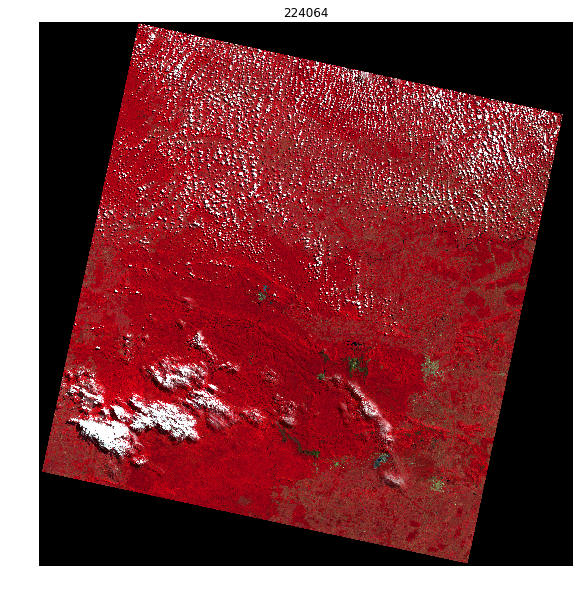

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


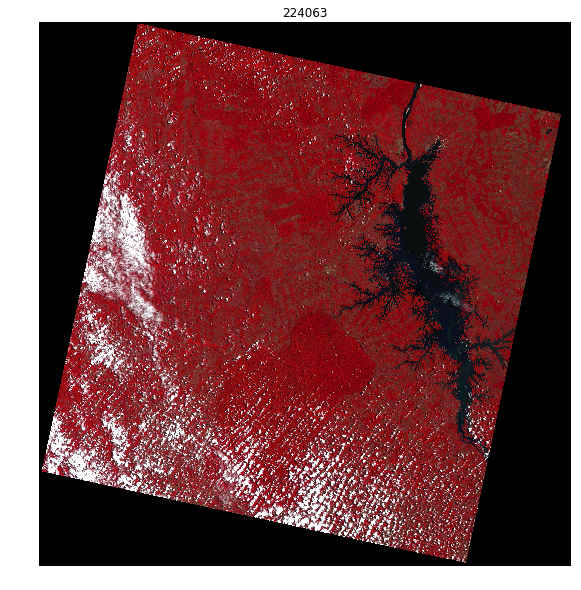

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


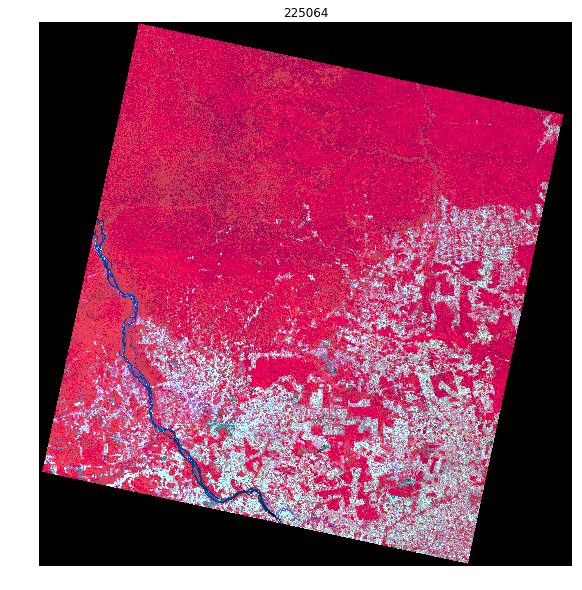

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


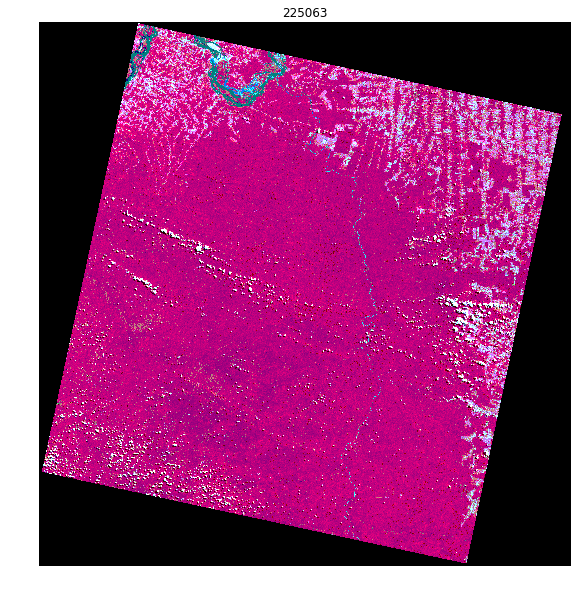

Stacking images from  2016
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


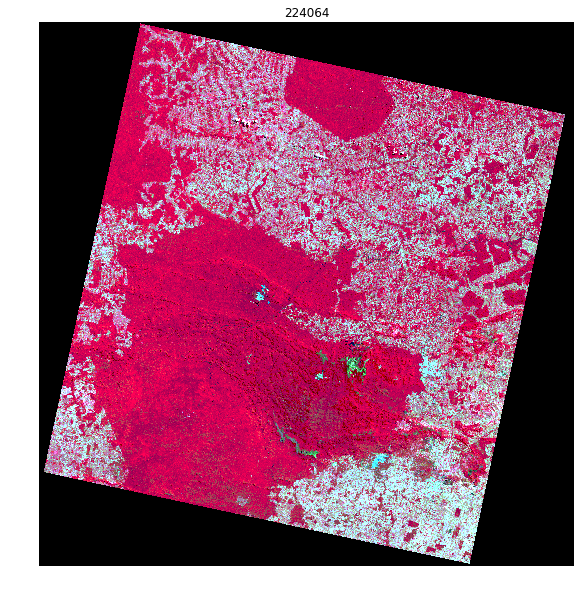

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


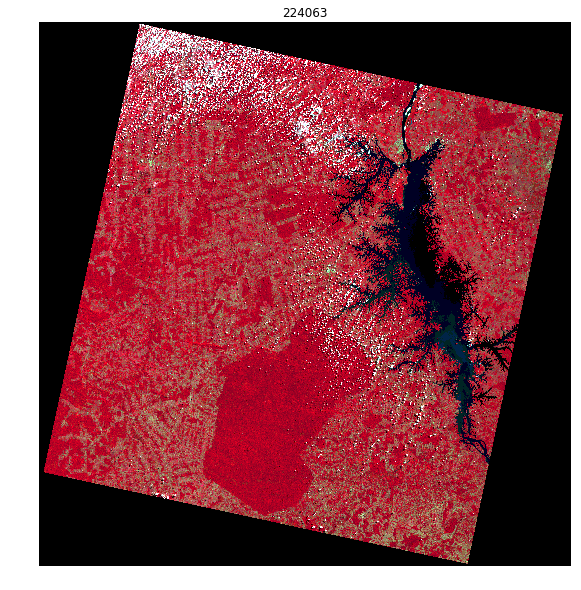

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


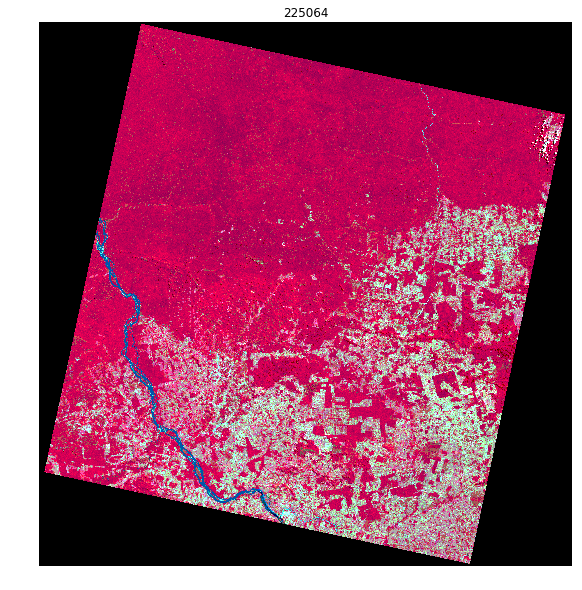

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


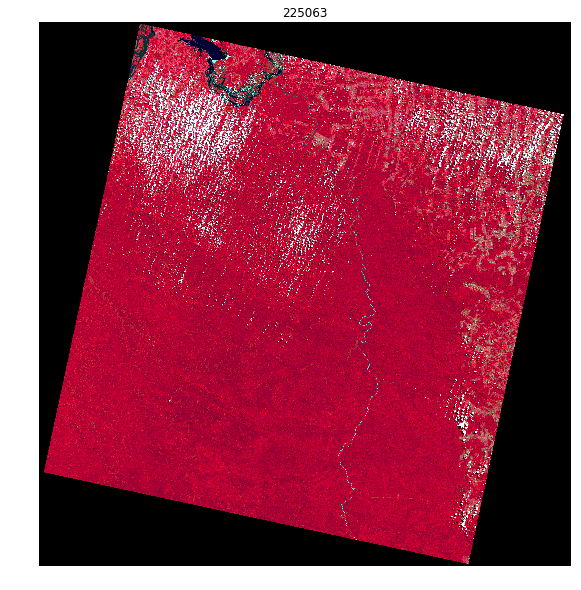

Stacking images from  2014
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


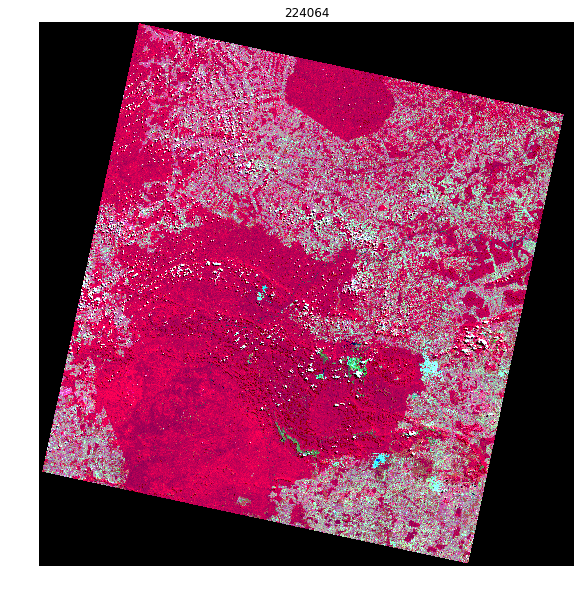

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


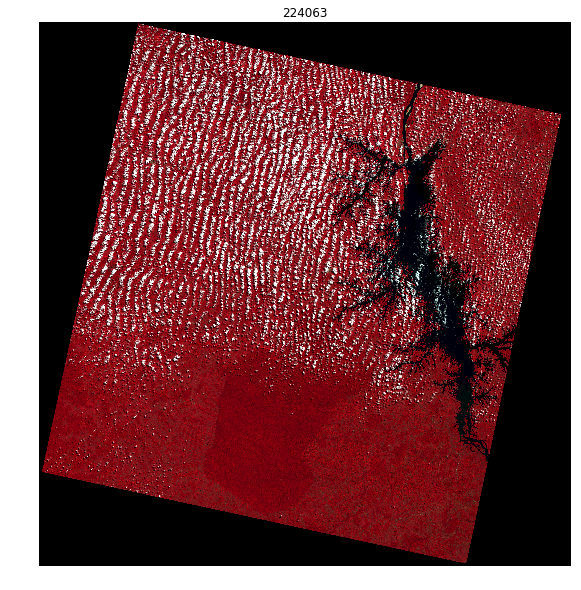

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


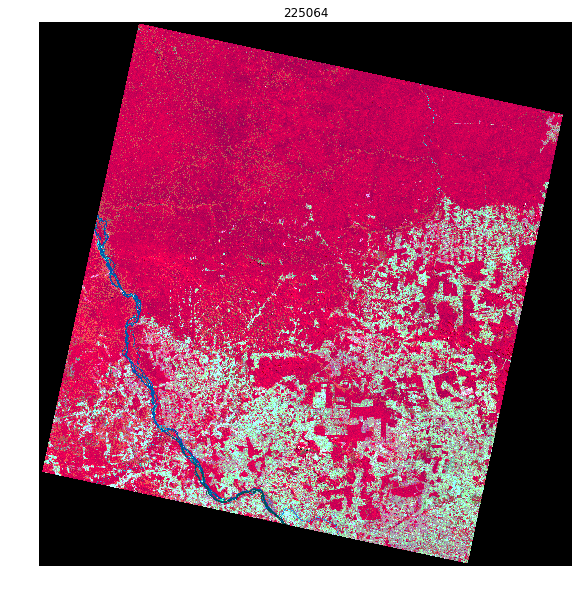

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


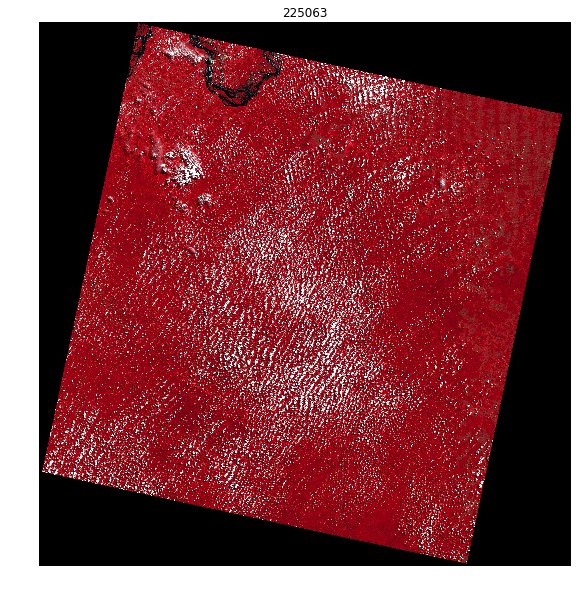

Stacking images from  2017
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


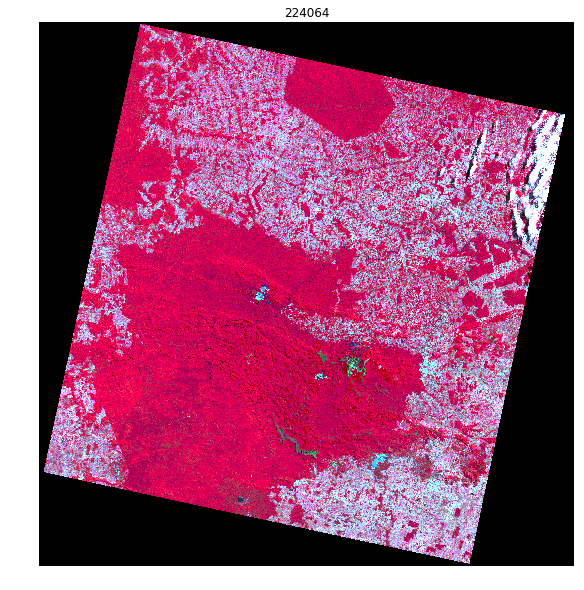

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


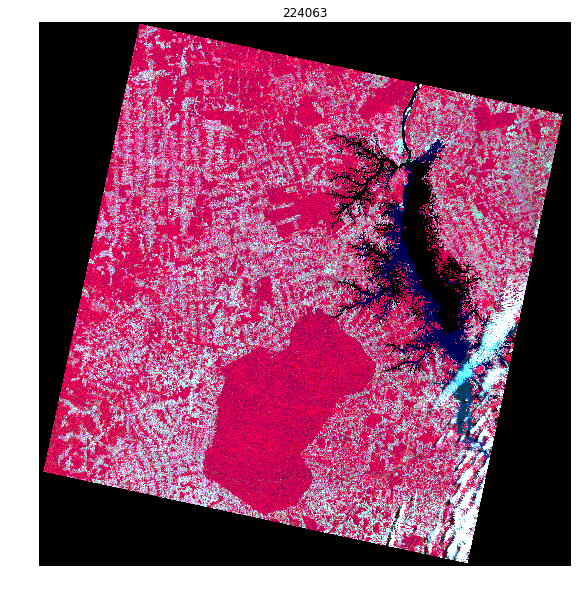

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


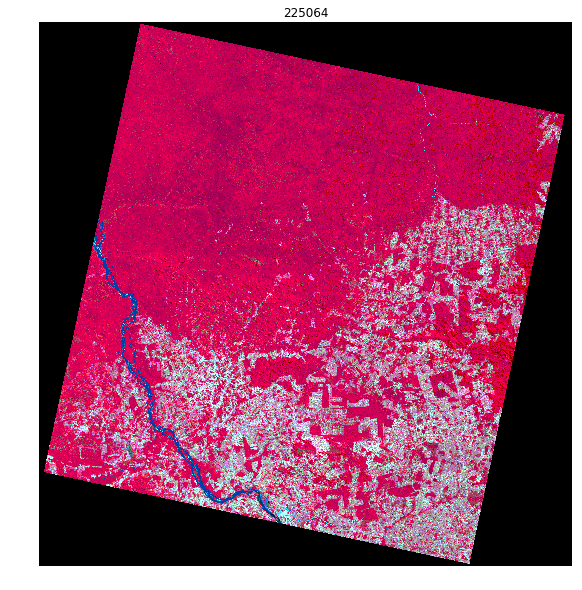

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


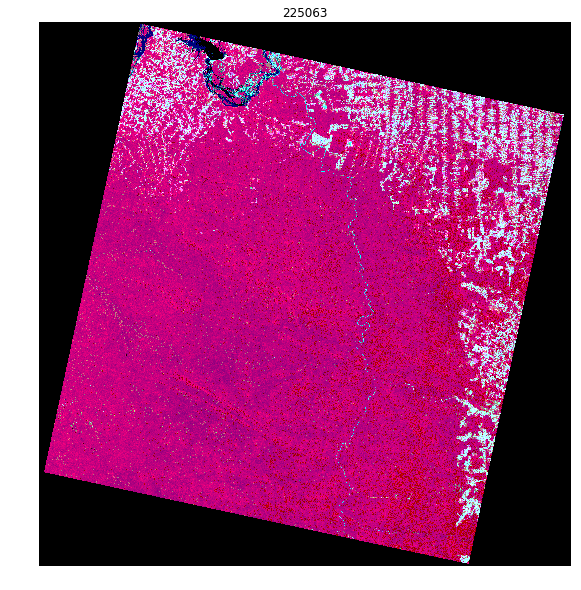

Stacking images from  2013
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


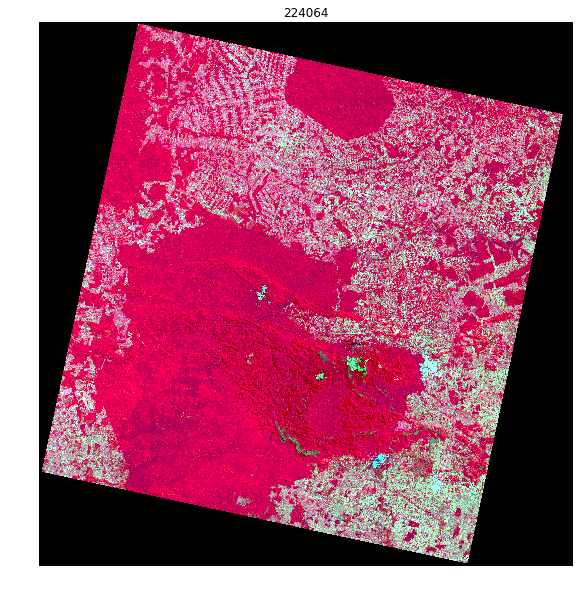

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


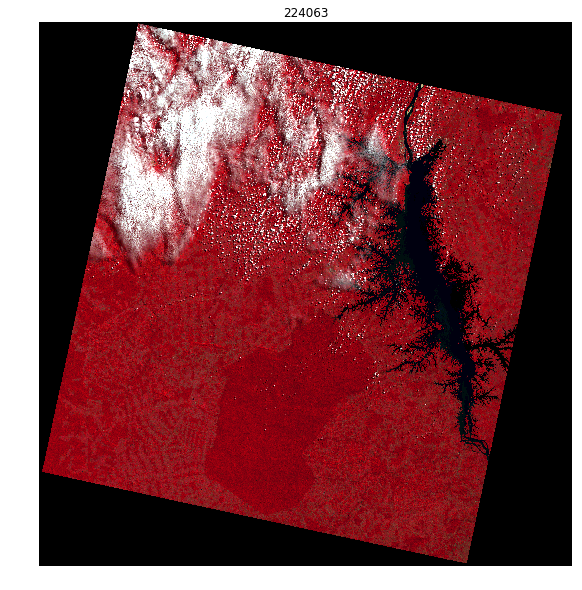

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


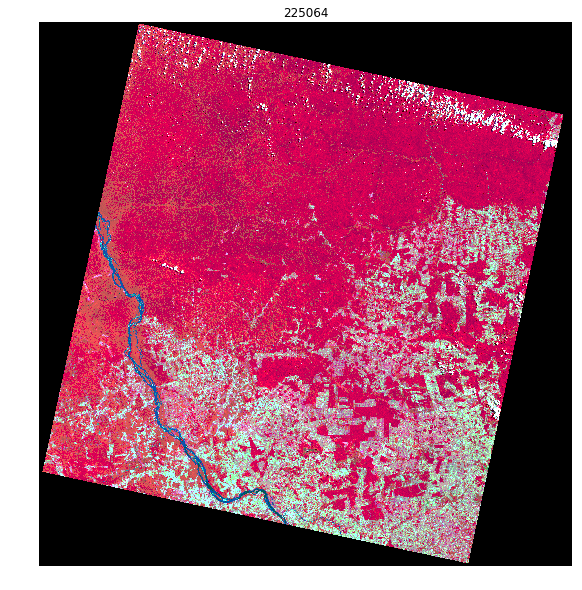

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


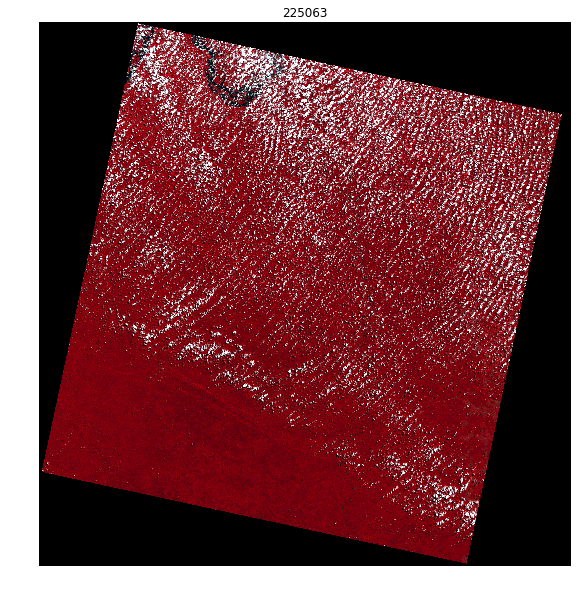

Stacking images from  2018
	Stacking scene  224064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


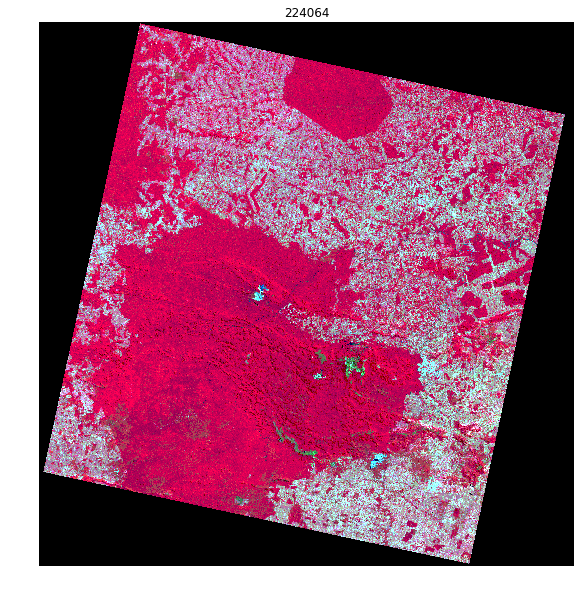

	Stacking scene  224063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


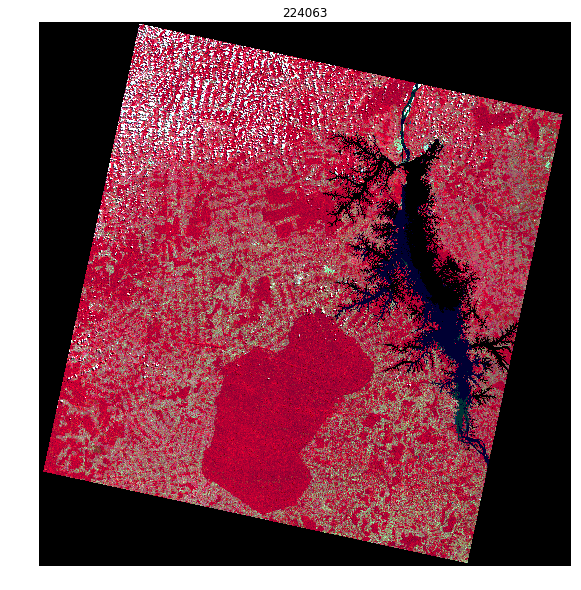

	Stacking scene  225064


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


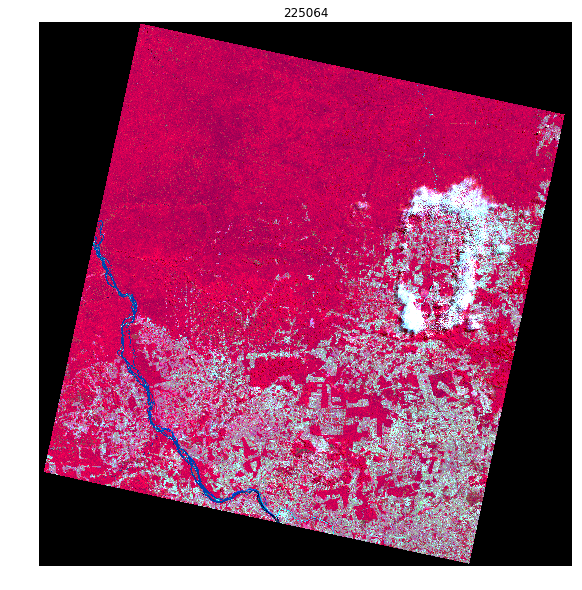

	Stacking scene  225063


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


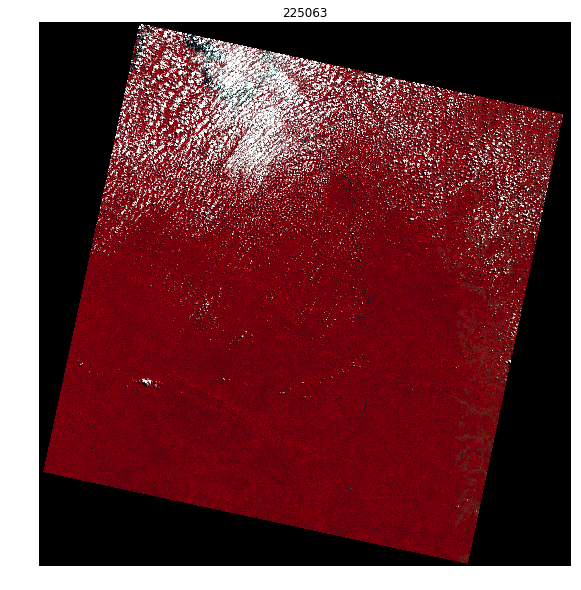

In [4]:
for year, scenes in input_files.items():
    print('Stacking images from ', year)
    for scene, ff in scenes.items():
        print('\tStacking scene ', scene)
        out_img = os.path.join(OUTPUT_DIR, output_files[year][scene])
        raster_bands = []
        for band in bands_to_stack:
            file_name = os.path.join(DATA_DIR, year, ff['folder'], (ff['file'] + band + '.tif'))
            raster_bands.append(file_name)
            
        iutils.stack_bands(raster_bands, out_img, bands_to_stack)
        raster_img = gf.load_image(out_img, no_data=-9999)
        vis.plot_rgb_img(raster_img, bands=[3,2,1], contrast=True, title=scene)